In [1]:
#import all modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# Set pandas display option to show all columns without truncation
pd.set_option('display.max_columns', None)

#read the date file into a dataframe called NBA from a csv file called all_seasons.csv
#This csv file is in the same folder with this notebook file
NBA= pd.read_csv('nba-player-stats-2022-2023.csv')
print(NBA)

      rk            player pos  age   tm   g  gs    mp   fg   fga    fgp  \
0      1  Precious Achiuwa   C   23  TOR  55  12  1140  196   404  0.485   
1      2      Steven Adams   C   29  MEM  42  42  1133  157   263  0.597   
2      3       Bam Adebayo   C   25  MIA  75  75  2598  602  1114  0.540   
3      4      Ochai Agbaji  SG   22  UTA  59  22  1209  165   386  0.427   
4      5      Santi Aldama  PF   22  MEM  77  20  1682  247   525  0.470   
..   ...               ...  ..  ...  ...  ..  ..   ...  ...   ...    ...   
534  535    Thaddeus Young  PF   34  NaN  54   9   795  108   198  0.545   
535  536        Trae Young  PG   24  NaN  73  73  2541  597  1390  0.429   
536  537    Omer Yurtseven   C   24  NaN   9   0    83   16    27  0.593   
537  538       Cody Zeller   C   30  NaN  15   2   217   37    59  0.627   
538  539       Ivica Zubac   C   25  NaN  76  76  2170  326   514  0.634   

     three_pfg  three_pfga  three_pfgp  two_pfg  two_pfga  two_pfgp   efgp  \
0        

**SORTING AND CLEANING OF DATA**

In [2]:
#show the top 5 rows of the NBA dataframe
NBA.head(5)

,rk,player,pos,age,tm,g,gs,mp,fg,fga,fgp,three_pfg,three_pfga,three_pfgp,two_pfg,two_pfga,two_pfgp,efgp,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,29,108,0.269,167,296,0.564,0.521,87,124,0.702,100,228,328,50,31,30,59,102,508
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,0,1,0.000,157,262,0.599,0.597,47,129,0.364,214,271,485,97,36,46,79,98,361
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,1,12,0.083,601,1102,0.545,0.541,324,402,0.806,184,504,688,240,88,61,187,208,1529
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,81,228,0.355,84,158,0.532,0.532,56,69,0.812,43,78,121,67,16,15,41,99,467
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,94,266,0.353,153,259,0.591,0.560,108,144,0.750,85,286,371,97,45,48,60,143,696


In [3]:
#Shows column info of each column
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rk          539 non-null    int64  
 1   player      539 non-null    object 
 2   pos         539 non-null    object 
 3   age         539 non-null    int64  
 4   tm          469 non-null    object 
 5   g           539 non-null    int64  
 6   gs          539 non-null    int64  
 7   mp          539 non-null    int64  
 8   fg          539 non-null    int64  
 9   fga         539 non-null    int64  
 10  fgp         537 non-null    float64
 11  three_pfg   539 non-null    int64  
 12  three_pfga  539 non-null    int64  
 13  three_pfgp  523 non-null    float64
 14  two_pfg     539 non-null    int64  
 15  two_pfga    539 non-null    int64  
 16  two_pfgp    534 non-null    float64
 17  efgp        537 non-null    float64
 18  ft          539 non-null    int64  
 19  fta         539 non-null    i

In [4]:
# Remove the "rk" Column since it stands for rank and criteria for ranking is unkown
NBA = NBA.drop('rk', axis = 1)
NBA = NBA.drop('pos', axis=1)
NBA = NBA.drop('gs', axis=1)
NBA = NBA.drop('trb', axis=1)

In [5]:
#renaming heads
NBA.columns = NBA.columns.str.upper()
#renaming some heads
NBA.rename(columns={'G': 'GAMES'}, inplace=True)  
NBA.columns = NBA.columns.str.replace('THREE', '3').str.replace('TWO', '2')
NBA.columns = NBA.columns.str.replace('MP', 'MINUTES')
NBA.columns = NBA.columns.str.replace('MINUTES', 'MIN')
NBA.columns = NBA.columns.str.upper()
#renaming some heads
NBA.rename(columns={'G': 'GAMES'}, inplace=True)  
NBA.columns = NBA.columns.str.replace('THREE', '3').str.replace('TWO', '2')
NBA.columns = NBA.columns.str.replace('MP', 'MINUTES')
NBA.columns = NBA.columns.str.replace('MINUTES', 'MIN')

In [6]:
NBA.head(5)

,PLAYER,AGE,TM,GAMES,MIN,FG,FGA,FGP,3_PFG,3_PFGA,3_PFGP,2_PFG,2_PFGA,2_PFGP,EFGP,FT,FTA,FTP,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,23,TOR,55,1140,196,404,0.485,29,108,0.269,167,296,0.564,0.521,87,124,0.702,100,228,50,31,30,59,102,508
1,Steven Adams,29,MEM,42,1133,157,263,0.597,0,1,0.000,157,262,0.599,0.597,47,129,0.364,214,271,97,36,46,79,98,361
2,Bam Adebayo,25,MIA,75,2598,602,1114,0.540,1,12,0.083,601,1102,0.545,0.541,324,402,0.806,184,504,240,88,61,187,208,1529
3,Ochai Agbaji,22,UTA,59,1209,165,386,0.427,81,228,0.355,84,158,0.532,0.532,56,69,0.812,43,78,67,16,15,41,99,467
4,Santi Aldama,22,MEM,77,1682,247,525,0.470,94,266,0.353,153,259,0.591,0.560,108,144,0.750,85,286,97,45,48,60,143,696


**DATA ANALYSIS**

In [7]:
#How many records in total
NBA["PLAYER"].count()

539

In [8]:
# Oldest age among all player records
NBA['AGE'].max()

42

In [9]:
#Who is the oldest player among all player records
NBA[NBA['AGE'] == NBA['AGE'].max()]['PLAYER']

200    Udonis Haslem
Name: PLAYER, dtype: object

In [10]:
#what is the minimum age? 
NBA['AGE'].min()


19

In [11]:
# Name of the youngest players
NBA[NBA['AGE'] == NBA['AGE'].min()]['PLAYER']

25      Dominick Barlow
54       Malaki Branham
64        Kendall Brown
89         Max Christie
108       Dyson Daniels
121       Ousmane Dieng
137         Jalen Duren
181          AJ Griffin
258        Nikola Jović
262        Trevor Keels
440      Shaedon Sharpe
452    Jabari Smith Jr.
455       Jeremy Sochan
505        Blake Wesley
Name: PLAYER, dtype: object

In [12]:
# Calculate the average age of NBA players
avg_age = NBA['AGE'].mean()
print(avg_age)

25.727272727272727


In [13]:
# Calculate the median age of NBA players
median_age = NBA['AGE'].median()
print(median_age)

25.0


In [14]:
# Calculate the mode of age (in case there is more than one mode)
mode_age = NBA['AGE'].mode()
print(mode_age)

0    23
Name: AGE, dtype: int64


In [15]:
# Calculate the range of the "AGE" column
age_range = NBA['AGE'].max() - NBA['AGE'].min()

# Print the age range
print(f"Age Range: {age_range:.2f}")

Age Range: 23.00


In [17]:
# Calculate the weighted mean age (assuming 'GAMES' as weights)
weighted_mean_age = (NBA['AGE'] * NBA['GAMES']).sum() / NBA['GAMES'].sum()
print(weighted_mean_age)

25.90430215493937


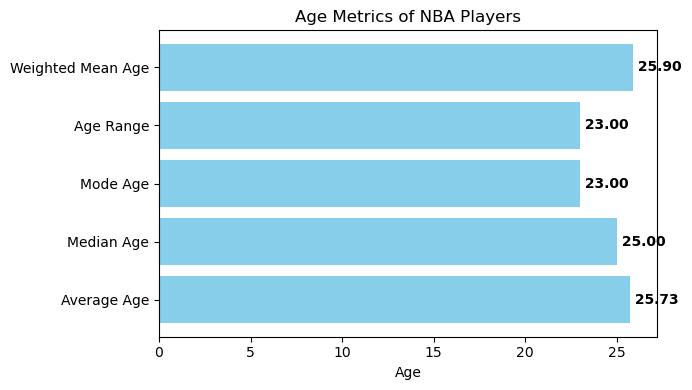

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the age metrics and their corresponding values
age_metrics = ['Average Age', 'Median Age', 'Mode Age', 'Age Range', 'Weighted Mean Age']
age_values = [avg_age, median_age, mode_age[0], age_range, weighted_mean_age]

# Convert age values to a numpy array
age_values = np.array(age_values)

# Create a horizontal bar plot
plt.figure(figsize=(7,4))
plt.barh(age_metrics, age_values, color='skyblue')
plt.xlabel('Age')
plt.title('Age Metrics of NBA Players')

# Annotate the bars with their values
for i, v in enumerate(age_values):
    plt.text(v, i, f' {v:.2f}', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()




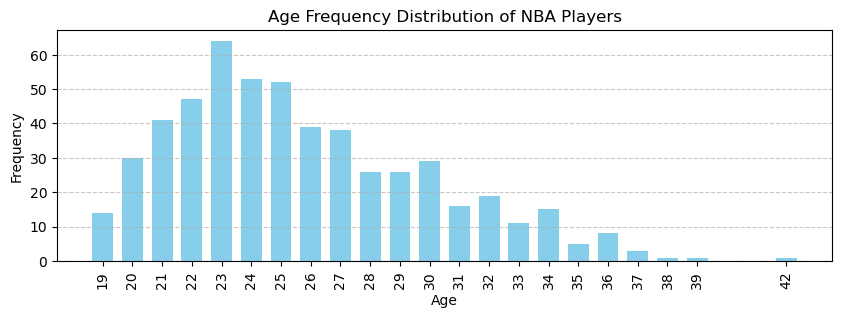

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the frequency distribution of age
age_frequency = NBA['AGE'].value_counts().sort_index()

# Create a bar chart to visualize the frequency distribution
plt.figure(figsize=(10,3))
plt.bar(age_frequency.index, age_frequency.values, width=0.7, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution of NBA Players')
plt.xticks(age_frequency.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

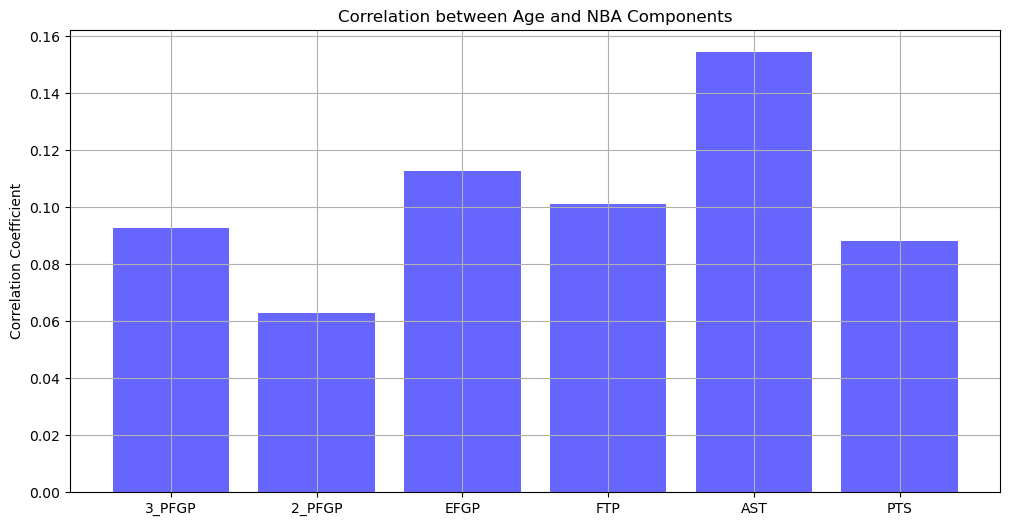

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the NBA DataFrame and performed the data preprocessing as mentioned in your original code

# Select the columns of interest
selected_columns = ['AGE', '3_PFGP', '2_PFGP', 'EFGP', 'FTP', 'AST', 'PTS']

# Calculate the correlations
correlations = NBA[selected_columns].corr()

# Extract the correlations of AGE with other components
correlation_age = correlations.loc[['AGE'], ['3_PFGP', '2_PFGP', 'EFGP', 'FTP', 'AST', 'PTS']]

# Create a bar plot to visualize the correlations
plt.figure(figsize=(12, 6))

# Plot the correlation of AGE with the components
plt.bar(correlation_age.columns, correlation_age.values[0], color='blue', alpha=0.6)

# Add labels and a title
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Age and NBA Components')

# Show the bar plot
plt.grid()
plt.show()


In [26]:
print("Correlations between Age and NBA Components:")
print(correlation_age)

Correlations between Age and NBA Components:
       3_PFGP    2_PFGP      EFGP       FTP       AST       PTS
AGE  0.092857  0.062868  0.112599  0.101328  0.154447  0.088345


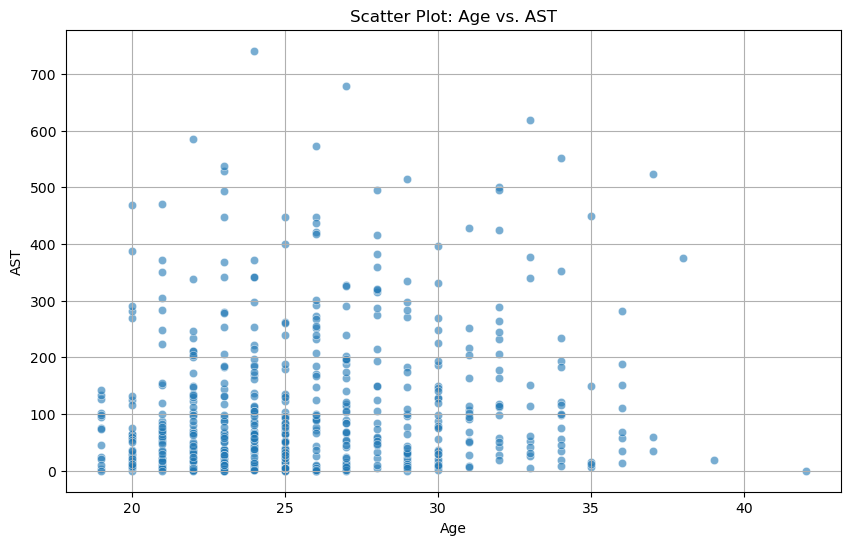

In [28]:
#Create a scatter plot for Age vs. AST
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='AST', data=NBA, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('AST')
plt.title('Scatter Plot: Age vs. AST')

# Show the scatter plot
plt.grid()
plt.show()

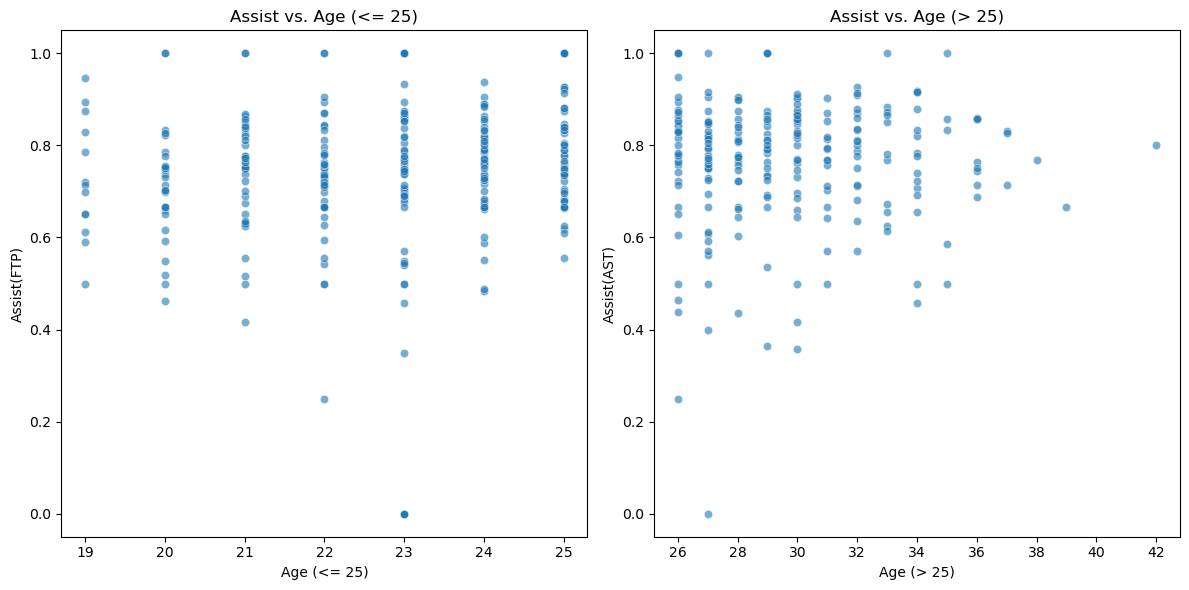

In [29]:
# Define the age threshold
age_threshold = 25

# Filter the data for players aged less than or equal to 25 and more than 25
young_players = NBA[NBA['AGE'] <= age_threshold]
old_players = NBA[NBA['AGE'] > age_threshold]

# Create two scatter plots: one for young players and one for old players
plt.figure(figsize=(12, 6))

# Scatter plot for young players (age <= 25)
plt.subplot(1, 2, 1)
sns.scatterplot(x='AGE', y='FTP', data=young_players, alpha=0.6)
plt.xlabel('Age (<= 25)')
plt.ylabel('Assist(FTP)')
plt.title('Assist vs. Age (<= 25)')

# Scatter plot for old players (age > 25)
plt.subplot(1, 2, 2)
sns.scatterplot(x='AGE', y='FTP', data=old_players, alpha=0.6)
plt.xlabel('Age (> 25)')
plt.ylabel('Assist(AST)')
plt.title('Assist vs. Age (> 25)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [32]:
# Calculate mean, variance, and standard deviation of AST for young players (age <= 25)
mean_AST_young = young_players['AST'].mean()
variance_AST_young = young_players['AST'].var()
std_deviation_AST_young = young_players['AST'].std()

# Calculate mean, variance, and standard deviation of AST for old players (age > 25)
mean_AST_old = old_players['AST'].mean()
variance_AST_old = old_players['AST'].var()
std_deviation_AST_old = old_players['AST'].std()

# Print the results
print("Statistics for AST for Young Players (Age <= 25):")
print(f"Mean: {mean_AST_young:.2f}")
print(f"Variance: {variance_AST_young:.2f}")
print(f"Standard Deviation: {std_deviation_AST_young:.2f}")
print("\n")
print("Statistics for AST for Old Players (Age > 25):")
print(f"Mean: {mean_AST_old:.2f}")
print(f"Variance: {variance_AST_old:.2f}")
print(f"Standard Deviation: {std_deviation_AST_old:.2f}")

Statistics for AST for Young Players (Age <= 25):
Mean: 94.25
Variance: 13632.99
Standard Deviation: 116.76


Statistics for AST for Old Players (Age > 25):
Mean: 142.48
Variance: 19554.32
Standard Deviation: 139.84


In [33]:
import pandas as pd

# Create a dictionary with the statistics
data = {
    'Group': ['Young Players (Age <= 25)', 'Old Players (Age > 25)'],
    'Mean AST': [94.25, 142.48],
    'Variance AST': [13632.99, 19554.32]
}

# Create a DataFrame from the dictionary
statistics_df = pd.DataFrame(data)

# Calculate the standard deviation (square root of variance) for AST
statistics_df['Std Dev AST'] = statistics_df['Variance AST'] ** 0.5

# Display the DataFrame
print(statistics_df)

                       Group  Mean AST  Variance AST  Std Dev AST
0  Young Players (Age <= 25)     94.25      13632.99   116.760396
1     Old Players (Age > 25)    142.48      19554.32   139.836762


Mean PTS: 523.4267161410019
Mode PTS: 9
Median PTS: 374.0


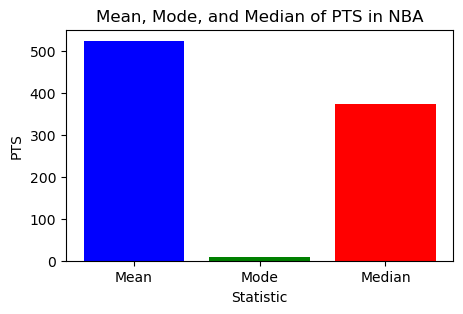

In [52]:
# Calculate the mean, mode, and median of the 'PTS' column
mean_pts = NBA['PTS'].mean()
mode_pts = NBA['PTS'].mode().values[0]  # In case there are multiple modes, take the first one
median_pts = NBA['PTS'].median()

# Print the results
print("Mean PTS:", mean_pts)
print("Mode PTS:", mode_pts)
print("Median PTS:", median_pts)

plt.figure(figsize=(5, 3))
plt.bar(['Mean', 'Mode', 'Median'], [mean_pts, mode_pts, median_pts], color=['blue', 'green', 'red'])
plt.xlabel('Statistic')
plt.ylabel('PTS')
plt.title('Mean, Mode, and Median of PTS in NBA')
plt.show()

In [36]:
# Calculate the population mean and population variance of 'PTS'
population_mean_pts = np.mean(NBA['PTS'])
population_variance_pts = np.var(NBA['PTS'], ddof=0)  # ddof=0 for population variance

# Print the results
print("Population Mean of PTS:", population_mean_pts)
print("Population Variance of PTS:", population_variance_pts)

Population Mean of PTS: 523.4267161410019
Population Variance of PTS: 247628.73442539413


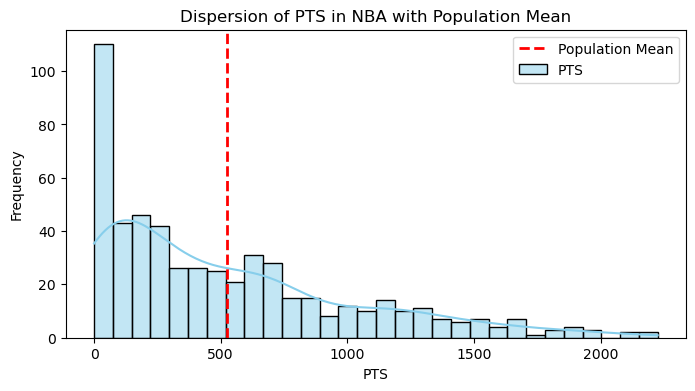

Population Mean of PTS: 523.4267161410019
Population Variance of PTS: 247628.73442539413


In [37]:
# Calculate the population mean and population variance of 'PTS'
population_mean_pts = np.mean(NBA['PTS'])
population_variance_pts = np.var(NBA['PTS'], ddof=0)  # ddof=0 for population variance

# Create a histogram to visualize the dispersion
plt.figure(figsize=(8, 4))
sns.histplot(NBA['PTS'], bins=30, kde=True, color='skyblue', label='PTS')
plt.axvline(population_mean_pts, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.xlabel('PTS')
plt.ylabel('Frequency')
plt.title('Dispersion of PTS in NBA with Population Mean')
plt.legend()
plt.show()

# Print the population mean and variance
print("Population Mean of PTS:", population_mean_pts)
print("Population Variance of PTS:", population_variance_pts)

In [38]:
 #Group the data by team and find the highest average PTS for each team
team_highest_avg_pts = NBA.groupby('TM')['PTS'].max()
print(team_highest_avg_pts)

TM
ATL    1344
BOS    1490
BRK    1239
CHI    1826
CHO    1675
CLE    1690
DAL    1671
DEN    1302
DET    1203
GSW     875
HOU    1216
IND    1936
LAC    1431
LAL    1515
MEM    2183
MIA    1784
MIL    1959
MIN    1913
NOP    1271
NYK    1148
OKC    1946
ORL    1329
PHI    1298
PHO    1568
POR    1369
SAC    1866
SAS    1505
TOR    2225
UTA    2138
WAS    1922
Name: PTS, dtype: int64


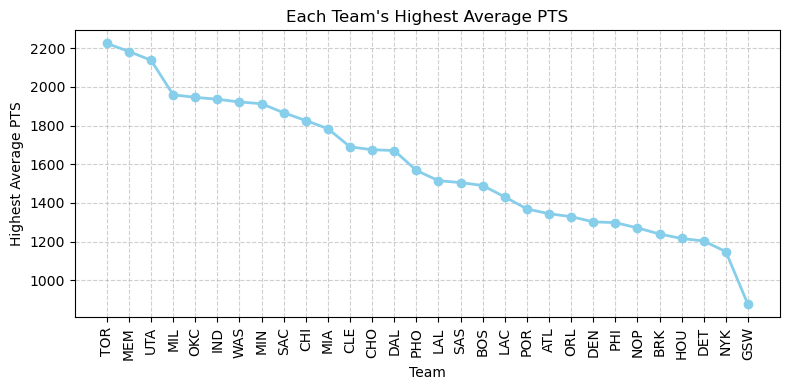

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by team and find the highest average PTS for each team
team_highest_avg_pts = NBA.groupby('TM')['PTS'].max().reset_index()

# Sort the data by highest average PTS in descending order
team_highest_avg_pts = team_highest_avg_pts.sort_values('PTS', ascending=False)

# Create a polygon (line plot) to visualize each team's highest average PTS
plt.figure(figsize=(8, 4))
plt.plot(team_highest_avg_pts['TM'], team_highest_avg_pts['PTS'], marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Team')
plt.ylabel('Highest Average PTS')
plt.title("Each Team's Highest Average PTS")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

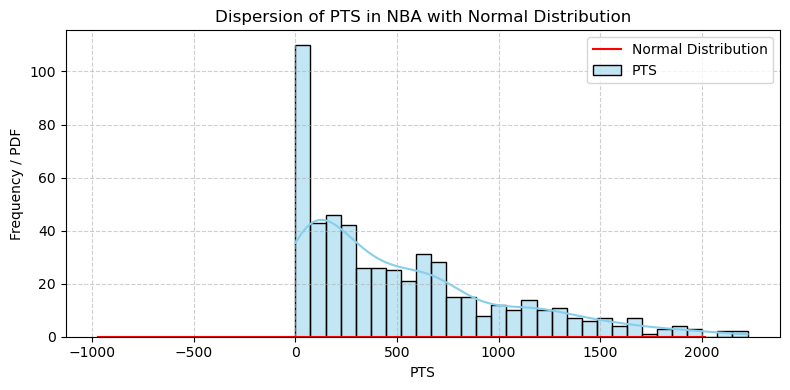

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


# Calculate the population mean and population variance of 'PTS'
population_mean_pts = np.mean(NBA['PTS'])
population_variance_pts = np.var(NBA['PTS'], ddof=0)  # ddof=0 for population variance

# Create a histogram to visualize the distribution of 'PTS'
plt.figure(figsize=(8, 4))
sns.histplot(NBA['PTS'], bins=30, kde=True, color='skyblue', label='PTS')

# Create a normal distribution based on population mean and variance
x = np.linspace(population_mean_pts - 3 * np.sqrt(population_variance_pts),
                population_mean_pts + 3 * np.sqrt(population_variance_pts), 1000)
plt.plot(x, norm.pdf(x, population_mean_pts, np.sqrt(population_variance_pts)), color='red', label='Normal Distribution')

plt.xlabel('PTS')
plt.ylabel('Frequency / PDF')
plt.title('Dispersion of PTS in NBA with Normal Distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

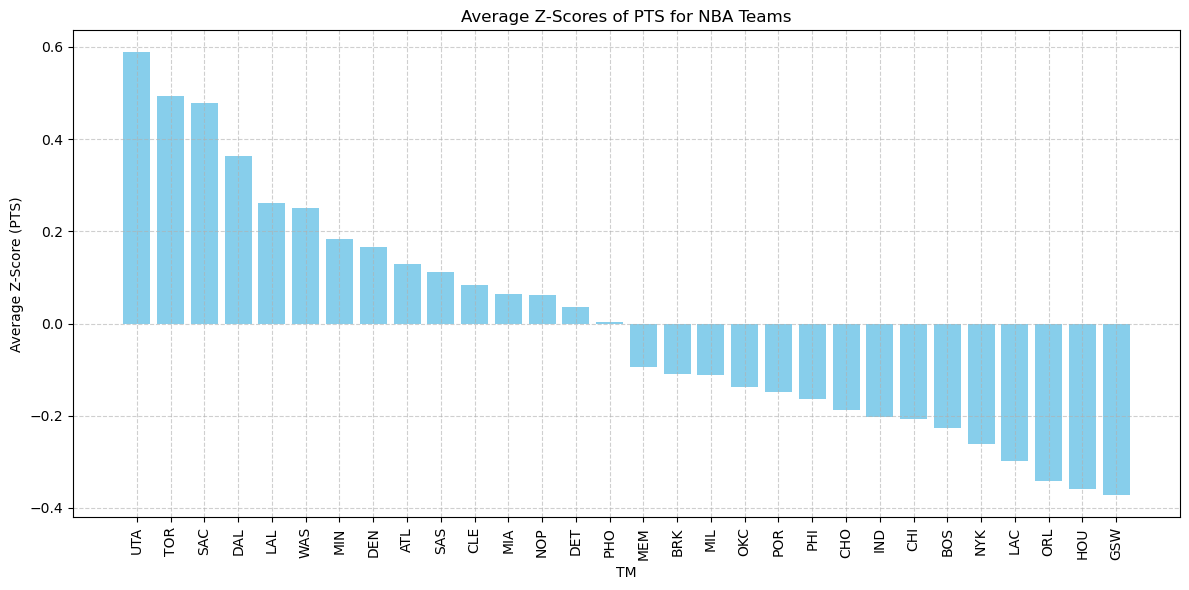

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the population mean and population standard deviation of 'PTS'
population_mean_pts = np.mean(NBA['PTS'])
population_std_pts = np.std(NBA['PTS'])

# Calculate the z-scores for each data point in the 'PTS' column
NBA['Z_Score_PTS'] = (NBA['PTS'] - population_mean_pts) / population_std_pts

# Calculate the average z-score for each team
team_avg_z_scores = NBA.groupby('TM')['Z_Score_PTS'].mean().reset_index()

# Sort the data by average z-score in descending order
team_avg_z_scores = team_avg_z_scores.sort_values(by='Z_Score_PTS', ascending=False)

# Create a bar chart to visualize the average z-scores for each team
plt.figure(figsize=(12, 6))
plt.bar(team_avg_z_scores['TM'], team_avg_z_scores['Z_Score_PTS'], color='skyblue')
plt.xlabel('TM')
plt.ylabel('Average Z-Score (PTS)')
plt.title('Average Z-Scores of PTS for NBA Teams')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

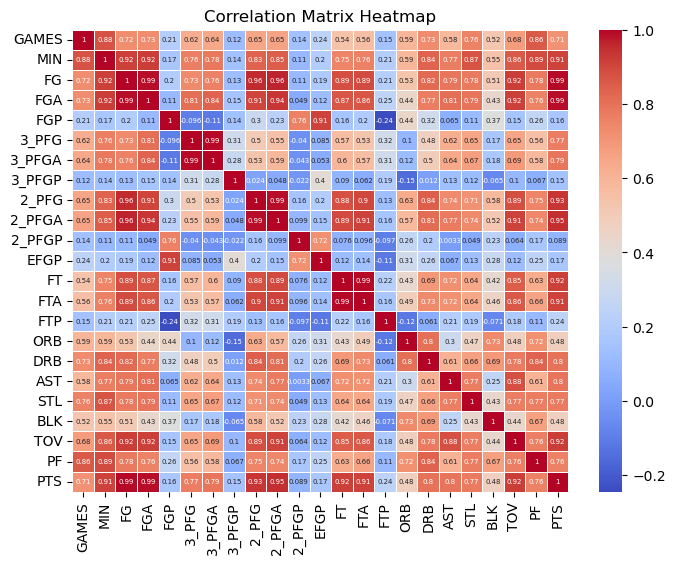

In [42]:
# Calculate the correlation matrix
correlation_matrix = NBA[['GAMES', 'MIN', 'FG', 'FGA', 'FGP', '3_PFG', '3_PFGA', '3_PFGP', '2_PFG', '2_PFGA', '2_PFGP', 'EFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 5}) # Adjust the size as needed
plt.title('Correlation Matrix Heatmap')
plt.show()

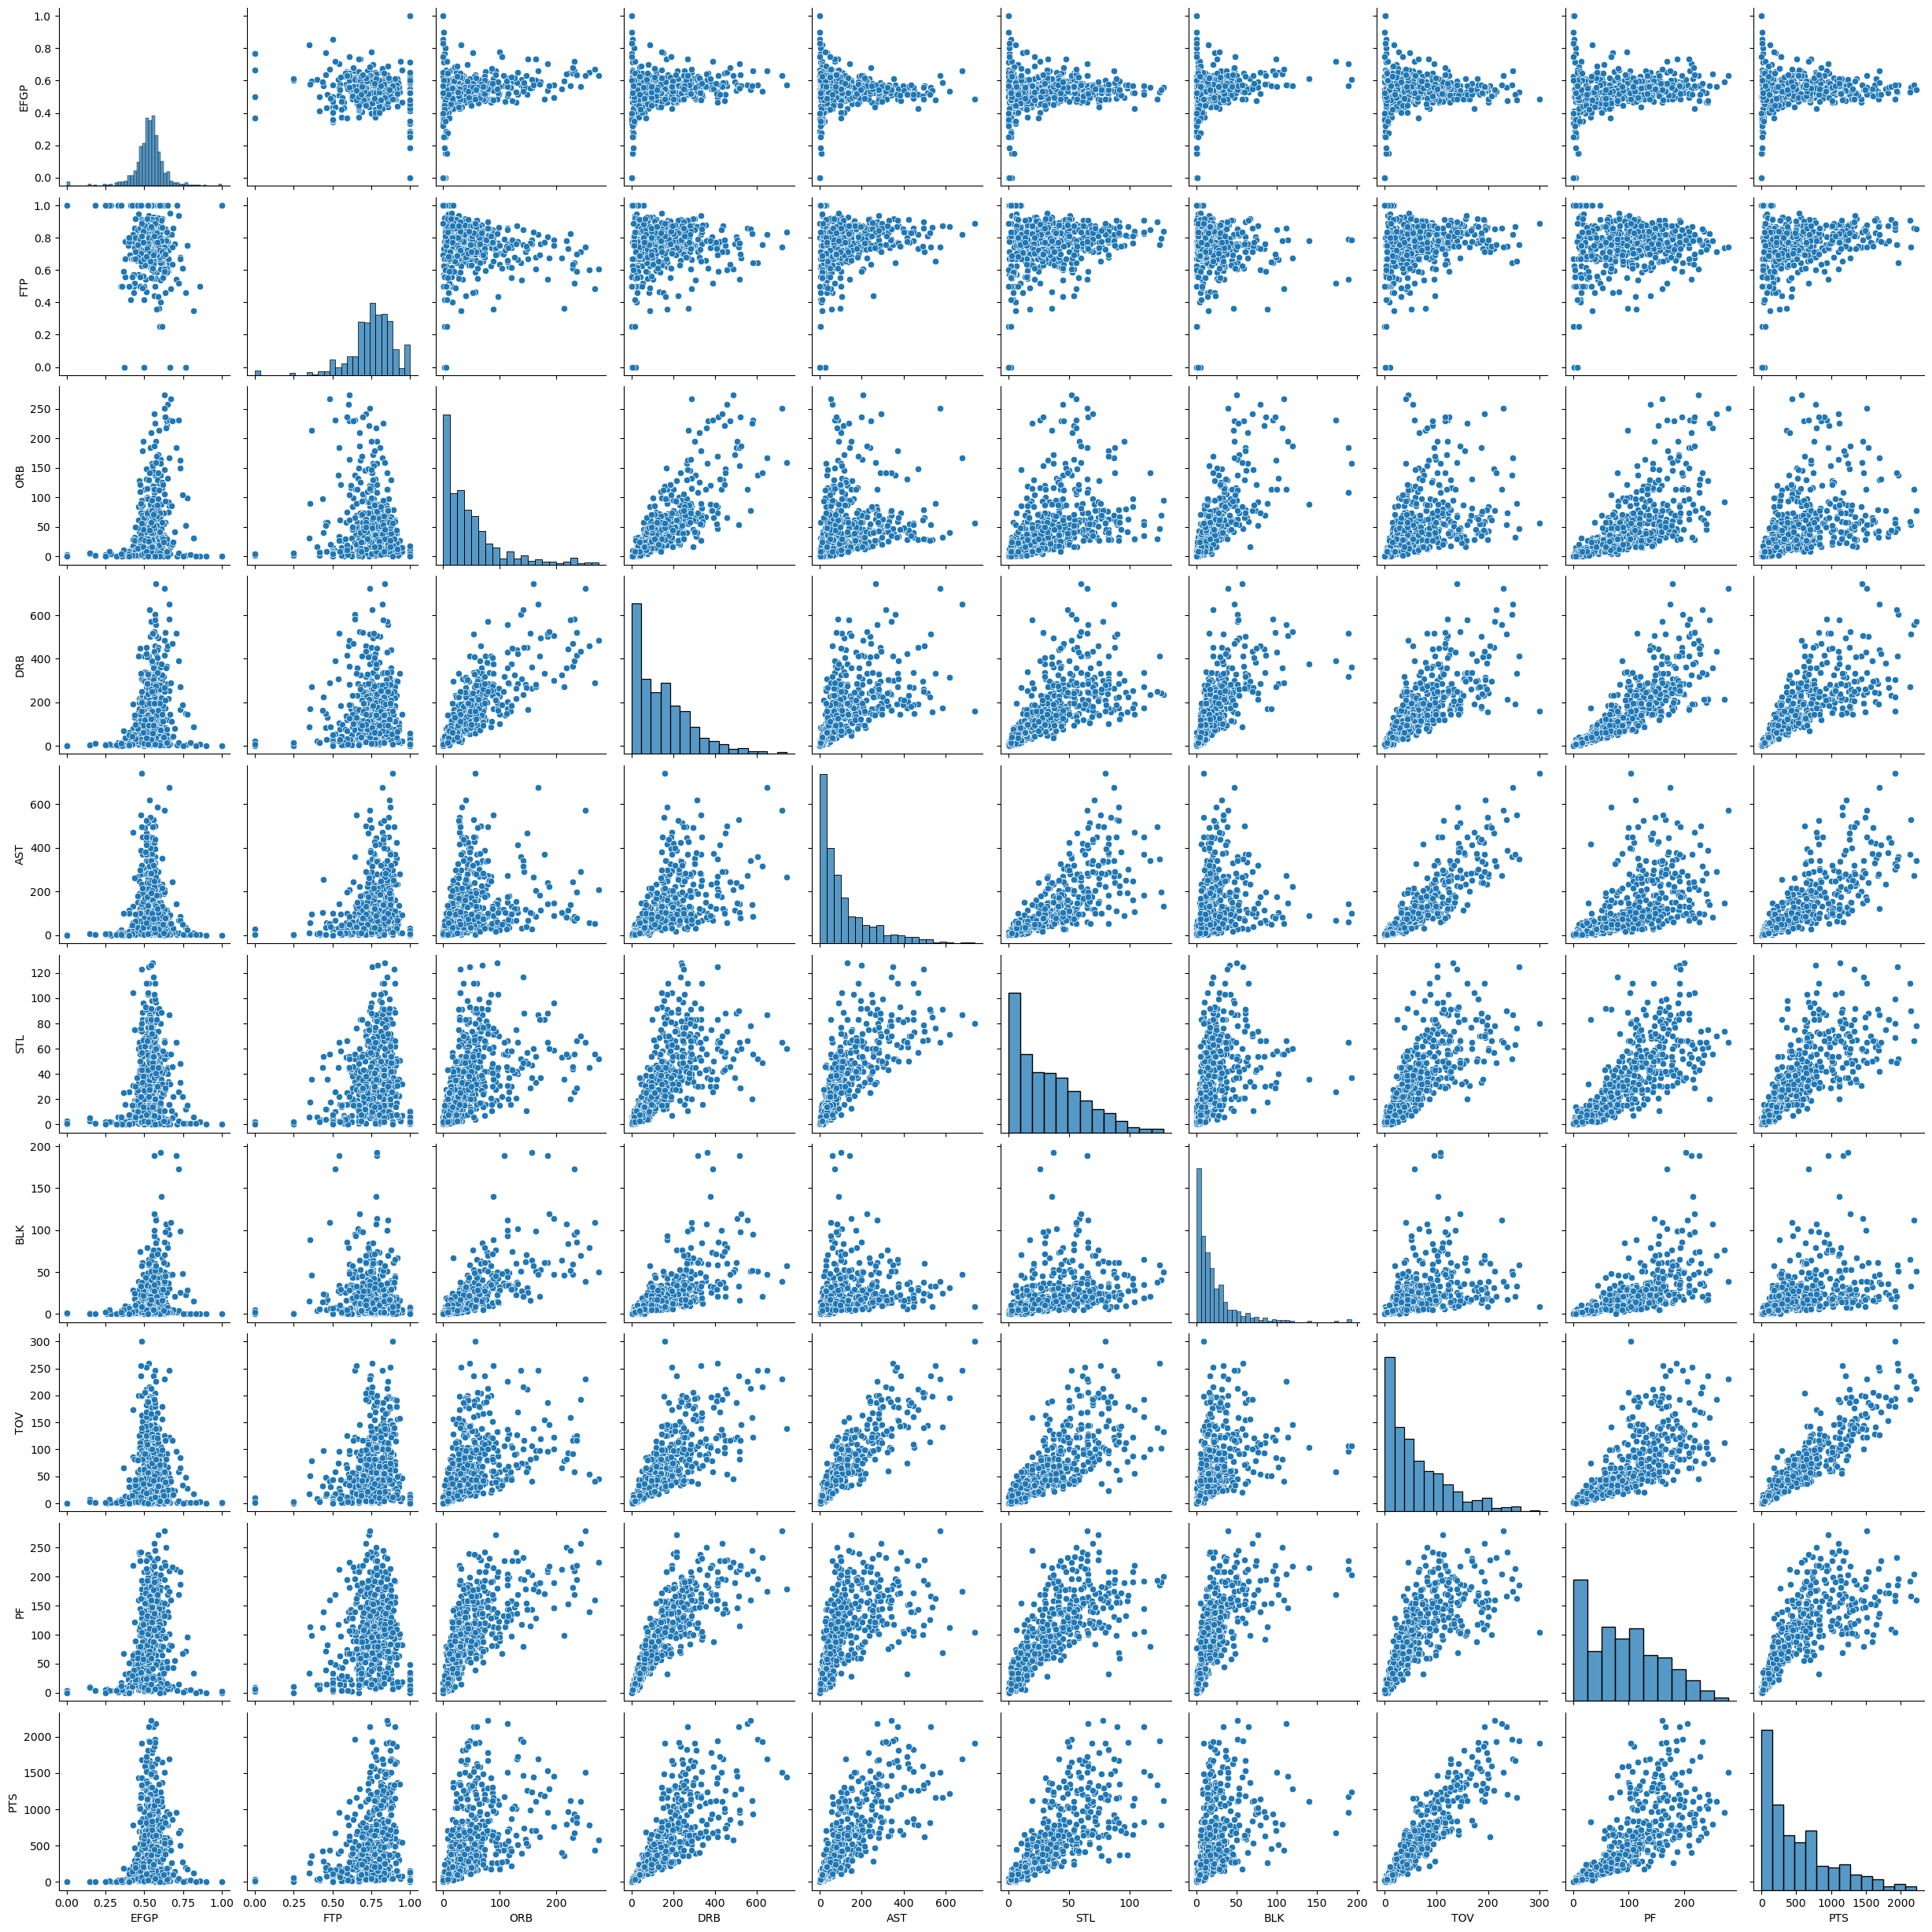

In [45]:
import seaborn as sns

# Select the columns for the pair plot
columns_for_pair_plot = NBA[['EFGP','FTP', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

# Create a pair plot
sns.pairplot(columns_for_pair_plot)
plt.show()